# **Scikit-Learn**

* **Scikit-Learn 문법의 공통점**
    1. 모델 불러오기 및 정의
            from sklearn.svm import SVC
            clf = SVC(C=1.0, kernel='rbf', random_state=2019)
        * hyper-parameter 세팅
    
    2. fit
            clf.fit(x_train, y_train)
        * (훈련)데이터로 모델 학습 또는 특징 추출
    
    3. predict or predict_proba or transform
            y_pred = clf.predict(x_test)
        * (테스트)데이터 라벨(확률) 예측 또는 변환
    
    4. scoring
            accuracy_score(y_test, y_pred)
        * 정확도, AUC, R2 등 적절한 스코어 함수로 결과 확인
    

In [5]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

abalone_path = join('abalone.txt')
column_path = join('abalone_attributes.txt')

abalone_columns = list()
for l in open(column_path):
    abalone_columns.append(l.strip())

In [6]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']

In [8]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
data.shape

(4177, 9)

In [10]:
# 성별 컬럼 삭제
del data['Sex']

In [11]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


---
## **1. Scaling**

## **스케일링을 왜 해야할까요?**
* 변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.
* Sklearn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다.

    1. Min-Max Scaling
        * Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다.
        * Sklearn에서 Min-Max Scaler는 preprocessing 패키지에 있습니다.

### 1) 모델 불러오기 및 정의하기

In [15]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()

### 2) 데이터에서 특징 찾기(Min, Max 값)

In [16]:
mMscaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

### 3) 데이터 변환

In [18]:
# 첫번째 방법
mMscaled_data = mMscaler.transform(data)

In [21]:
# 두번째 방법
mMscaled_data = mMscaler.fit_transform(data)

In [24]:
print(mMscaled_data.min())
print(mMscaled_data.max())

0.0
1.0


### 4) 결과 살펴보기

In [27]:
mMscaled_data = pd.DataFrame(mMscaled_data, columns = data.columns)
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


---
## **2. Standard Scaling**
* z-score라고 하는 데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다.
* 데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.
* Sklearn에서 Standard Scaler는 preprocessing 패키지에 있습니다.

### 1. 모델 불러오기 및 정의하기

In [28]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler

sdscaler = StandardScaler()

### 2. 데이터에서 특징 찾기(Mean, Std 값)

In [29]:
sdscaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

### 3. 데이터 변환

In [30]:
sdscaled_data = sdscaler.transform(data)

### 4. 결과 살펴보기

In [31]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns)
sdscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


* 기존 데이터에서는 변수별로 서로 다른 평균과 표준 편차값을 가지고 있었습니다.
* 그러나 위에서 Scaling과 Standard Scaling으로 데이터를 처리한 후 살펴보면,평균이 0 표준편차가 1이 되었음을 확인할 수 있습니다.

---
## **Sampling**

### **샘플링은 왜 할까요?**
* 클래스 불균형
    * 클래스 불균형이란, 분류를 목적으로 하는 데이터 셋에 클래스 라벨의 비율이 균형을 맞추지 않고, 한쪽으로 치우친 경우를 말합니다.
    * 이런 경우 모델이 각 클래스의 데이터를 제대로 학습하기 어려워집니다. 따라서 각 클래스별 균형을 맞추는 작업이 필요합니다.

#### 샘플링은 다음과 같이 크게 두 가지로 나눌 수 있습니다.
* 적은 클래스의 데이터 수를 증가시키는 Oversampling
* 많은 클래스의 데이터 수를 감소시키는 Undersampling

## **1. Random Over, Under Sampling**
* 가장 쉽게 (Over, Under) 샘플링 하는 방법은 임의(Random)로 데이터를 선택하여, 복제하거나 제거하는 방식을 사용할 수 있습니다. 하지만 이러한 방식은 몇가지 문제점이 있습니다.
    1. 복제하는 경우, 선택된 데이터의 위치에 똑같이 점을 찍기 때문에 데이터 자체에 과적합될 수 있음
    2. 제거하는 경우, 데이터셋이 가지고 있는 정보의 손실이 생길 수 있음
* 샘플링 알고리즘은 클래스 불균형 처리를 위한 imblearn(imbalanced-learn) 라이브러리에 있습니다.
    * Random Over, Under Sampler는 imblearn 라이브러리의 over_sampling, under_sampling 패키지에 있습니다.

### 1) 모델 불러오기 및 정의하기

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

### 2, 3) 데이터에서 특징 찾기 (데이터 비율) / 데이터 샘플링

In [33]:
# 데이터에서 특징을 학습함과 동시에 데이터 샘플링

# Over 샘플링
oversampled_data, oversampled_label = ros.fit_resample(data, label)
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

# Under 샘플링
undersampled_data, underampled_label = rus.fit_resample(data, label)
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)

### 4) 결과 살펴보기

In [34]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nRandom Over 샘플링 결과 \n{}'.format(pd.get_dummies(oversampled_label).sum()))
print('\nRandom Under 샘플링 결과 \n{}'.format(pd.get_dummies(underampled_label).sum()))

원본 데이터의 클래스 비율 
F    1307
I    1342
M    1528
dtype: int64

Random Over 샘플링 결과 
F    1528
I    1528
M    1528
dtype: int64

Random Under 샘플링 결과 
F    1307
I    1307
M    1307
dtype: int64


## **2. SMOTE(Synthetic Minority Oversampling Technique)**
* Random Over, Under Sampling은 데이터의 중복이로 인한 과적합 문제와 데이터 손실의 문제가 있습니다.
* 이런 문제를 최대한 피하면서 데이터를 생성하는 SMOTE 알고리즘이 있습니다.
* SMOTE의 기본 개념은 어렵지 않습니다. 수가 적은 클래스의 점을 하나 선택해 k개의 가까운 데이터 샘플을 찾고 그 사이에 새로운 점을 생성합니다.
* SMOTE의 장점으로는 데이터의 손실이 없으며 Over Sampling을 했을 때 보다 과적합을 완화할 수 있습니다.

* 전복 데이터셋은 SMOTE로 생성되는 데이터 샘플을 살펴보기 어려우므로, 임의의 데이터 샘플을 생성해 살펴보겠습니다.
* 1,000개의 데이터 샘플이 5:15:80 비율로 되어있으며, 2차원 데이터를 생성합니다.
* SMOTE는 imblearn 라이브러리의 over_sampling 패키지에 있습니다.

In [37]:
from sklearn.datasets import make_classification
data, label = make_classification(n_samples = 1000, n_features = 2, n_informative = 2,
                                 n_redundant = 0, n_repeated = 0, n_classes = 3,
                                  n_clusters_per_class = 1,
                                 weights = [0.05, 0.15, 0.8],
                                 class_sep = 0.8, random_state = 2019)

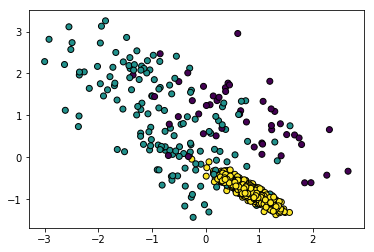

In [39]:
fig = plt.Figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], c = label, linewidths = 1, edgecolors = "black")
plt.show()

### 1) 모델 불러오기 및 정의하기

In [41]:
from imblearn.over_sampling import SMOTE
## k_neighbors 파라미터로 가까운 데이터의 샘플의 수를 결정할 수 있습니다.
smote = SMOTE(k_neighbors = 5)

### 2, 3) 데이터에서 특징 찾기 (데이터 비율) / 데이터 샘플링

In [42]:
smoted_data, smoted_label = smote.fit_resample(data, label)

### 4) 결과 살펴보기

In [43]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     53
1    154
2    793
dtype: int64

SMOTE 결과 
0    793
1    793
2    793
dtype: int64


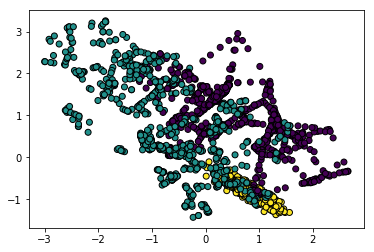

In [44]:
fig = plt.Figure(figsize=(12, 6))
plt.scatter(smoted_data[:, 0], smoted_data[:, 1], c = smoted_label, linewidths = 1,
           edgecolors = 'black')
plt.show()

---
## **Dimensionality Reduction**

## **차원 축소는 왜 해야할까요? - 차원의 저주**
* 차원의 저주는 저차원에서는 일어나지 않는 현상들이 고차원에서 데이터를 분석하거나 다룰 때 생겨나는 현상을 말합니다.
* 고차원으로 올라갈수록 공간의 크기가 증가하는데, 데이터는 해당 공간에 한정적으로 위치되어 빈 공간이 많아지기 때문에 발생합니다.
* 이런 이유로 데이터의 차원이 너무 큰 경우 필요없는 변수를 제거하고, 과적합을 방지하기 위해 데이터의 차원을 축소합니다. 또는 사람이 인식할 수 있는 차원은 3차원이 최대이므로 데이터의 시각화를 위해 차원을 축소하기도 합니다.

## **1. 주성분 분석(Principal Component Analysis, PCA)**
* 대표적인 차원 축소 기법으로 주성분 분석(PCA)이라는 방법이 있습니다.
* PCA는 여러 차원으로 이루어진 데이터를 가장 잘 표현하는 축으로 Projection 하여 차원을 축소하는 방식을 사용합니다.
* 데이터를 가장 잘 표현하는 축이란, 데이터의 분산을 잘 표현하는 축이라고 할 수 있습니다.
* 기본적으로 주성분(Principal Component, PC)은 데이터셋을 특이값 분해하여 추출된 고유 벡터입니다.
* 각 고유 벡터들은 서로 직교성을 띄기 때문에 데이터를 주성분으로 Projection 시켰을 때 서로 독립적으로 데이터를 잘 표현할 수 있습니다.
* PCA의 단점으로는 떨어뜨린 주성분이 어떤 컬럼인지 설명할 수 없다는 점입니다.

### 주성분 분석의 단계
* 각 컬럼들의 값의 범위를 평균과 표준편차를 사용해 정규화시켜 동일하게 만들어줍니다. (스케일링)
* 데이터의 공분산을 계산합니다.
* 공분산 행렬에 대해 특이값 분해를 하여 주성분(고유 벡터)과 고유값을 얻어냅니다.
* 주성분과 대응되는 고유값은 주성분이 데이터의 분산을 표현하는 정도의 척도로 사용되므로, 고유값의 크기와 비율을 보고 몇개의 주성분을 선택할 것인지 또는 원하는 차원의 개수만큼의 주성분을 선택합니다.
* 선택한 주성분으로 모든 데이터를 Projection시켜 데이터의 차원을 축소합니다.

### Projection(사영)
* 벡터 공간에서 어떤 벡터 a와 b가 있을 때 벡터 b를 a에 사영한 결과(x)는 아래 그림과 같습니다.
* 벡터 b를 벡터 a에 사양한다는 것은 벡터 a에 대해 수직 방향으로 벡터 b를 떨어뜨리는 것을 의미합니다.
* 간단하게 벡터 b의 그림자를 벡터 a에 떨어뜨린 것을 생각하면 편합니다.